## Following the activity with Vaca Muerta well 156490, let's fit automatically 4 wells from the Loma Campana concession. For this we will need to understand the following concepts:
- Functions
- Opening Excel files
- Pandas DataFramesLStoring data into a DataFrame
- Use of SciPy functionalities to find Duong coefficients for each well
- Exercise some advanced functionalites in Matplotlib

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

Define the Duong equation as a Function. Functions are an extremely useful way to reutilise part of your code.

In [9]:
def duong(t, qi, m, a):

    q = (qi * np.power(t,-m))* np.exp((a / (1 - m)) * ((np.power(t,(1-m))) - 1))
    return q

Open the Excel directly into a Pandas data frame.

In [10]:
df = pd.read_excel(open(r"Vaca Muerta 4 wells.xlsx",'rb'),sheet_name='Base')
print(df.head(5))

  fecha_data     W156490     W156491     W156492     W156493
0 2016-03-31  248.956138   87.266016   35.599338   30.486908
1 2016-04-30  434.084243  404.350072  608.556469  428.278882
2 2016-05-31  383.696187  412.522948  610.142374  430.873249
3 2016-06-30  400.761679  601.352872  438.784213  412.504387
4 2016-07-31  322.644003  344.518767  321.722157  362.186449


The following is a simple operation to add an extra column with Time instead of Dates.

In [11]:
dates = np.array(df['fecha_data'])

min_time = min(df['fecha_data'])
df['time'] = df['fecha_data'] - min_time

Let's get some critical information about the dataframe, such as the name of the wells in the header of the columns and the column date.

In [12]:
well_id = ['W156490', 'W156491', 'W156492', 'W156493']
well_color = ['blue', 'red', 'green', 'pink']
well_count = len(well_id)
print()

In the next step is where the fit should occur. Make sure to iterate over each well to get the initial rate, m and a coefficients. The curve_fit function is set as a placeholder for you to complete.

[1.05284665e+03 1.08088705e+00 9.62735096e-01]


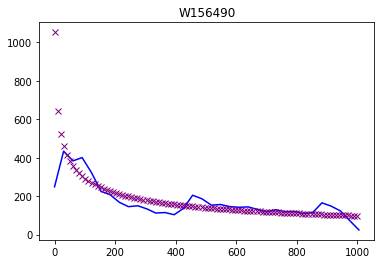

[1.07333608e+03 1.09543091e+00 1.04519198e+00]


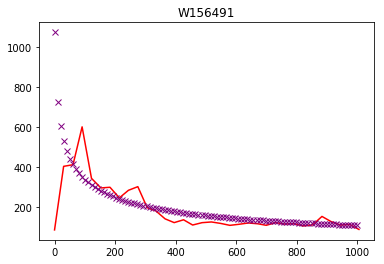

[1.78516707e+03 1.13479830e+00 1.06356097e+00]


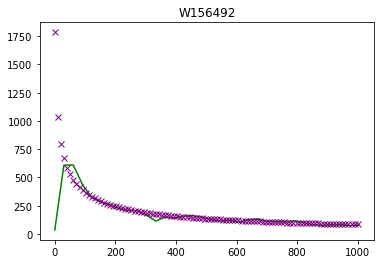

[47.50129291  1.27270427  2.99      ]


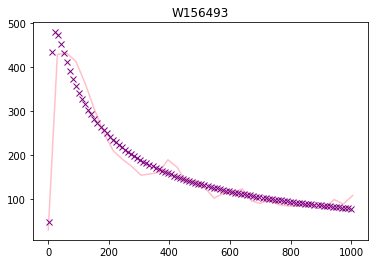

In [13]:
t = np.linspace(1,1000,100)
for x in range(well_count):
    popt, pcov = curve_fit(duong, df['time'].dt.days + 0.001, df[well_id[x]] * 1.0, bounds=(0, [10000.0, 2.99, 2.99]))
    print(popt)
    plt.plot(df['time'].dt.days,df[well_id[x]],color = well_color[x])
    q = duong(t, popt[0], popt[1], popt[2])
    plt.plot(t, q, "x", color='purple')
    plt.title(well_id[x])
    #fig1.add_subplot(221)
    plt.show(block=True)